# HomeWork number Two
## Machine Learning 
### Professor : Dr Rezvanian
### Student : Mahdi Mahdiani 4021334041 
#### Date :  Azar 1402 
##### Question 1 

## Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, StratifiedKFold,GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /Users/mahdi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Read Data Set

In [2]:
df = pd.read_excel("HW2_AUT_MLPR_4021-1-SPAM text message 20170820 (1).xlsx")

## EDA 

In [71]:
df.head()

,Message,Category,num_characters,num_sentences,num_words
0,"Go until jurong point, crazy.. Available only ...",0,111,2,24
1,Ok lar... Joking wif u oni...,0,29,2,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,2,37
3,U dun say so early hor... U c already then say...,0,49,1,13
4,"Nah I don't think he goes to usf, he lives aro...",0,61,1,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Message   5572 non-null   object
 1   Category  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.describe()

,Message,Category
count,5572,5572
unique,5157,2
top,"Sorry, I'll call later",ham
freq,30,4825


In [6]:
df.shape

(5572, 2)

In [7]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [8]:
df.isnull().sum()

Message     0
Category    0
dtype: int64

### Remove Duplicate Rows

In [9]:
df.duplicated().sum()

415

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(5157, 2)

## Encode Spam to 1 and Ham to 0 

In [13]:
label_encoder = LabelEncoder()
df["Category"] = label_encoder.fit_transform(df["Category"])
df

,Message,Category
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will أ¼ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [14]:
df["Message"] = df["Message"].astype(str) 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Message   5157 non-null   object
 1   Category  5157 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


<Axes: xlabel='Category', ylabel='count'>

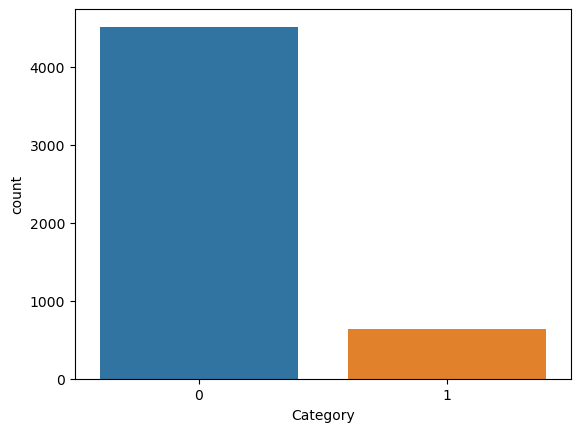

In [16]:
sns.countplot(x='Category', data=df)

In [17]:
# num of characters
df["num_characters"] = df["Message"].apply(len)
df

,Message,Category,num_characters
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,161
5568,Will أ¼ b going to esplanade fr home?,0,37
5569,"Pity, * was in mood for that. So...any other s...",0,57
5570,The guy did some bitching but I acted like i'd...,0,125


In [18]:
def get_num_sentences(text):
    if isinstance(text, str):
        return len(nltk.sent_tokenize(text))
    else:
        return 0 
df["num_sentences"] = df["Message"].apply(get_num_sentences)
df

,Message,Category,num_characters,num_sentences
0,"Go until jurong point, crazy.. Available only ...",0,111,2
1,Ok lar... Joking wif u oni...,0,29,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,2
3,U dun say so early hor... U c already then say...,0,49,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,1
...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,161,4
5568,Will أ¼ b going to esplanade fr home?,0,37,1
5569,"Pity, * was in mood for that. So...any other s...",0,57,2
5570,The guy did some bitching but I acted like i'd...,0,125,1


In [19]:
df["num_words"] = df["Message"].apply(lambda x: len(nltk.word_tokenize(x)))
df

,Message,Category,num_characters,num_sentences,num_words
0,"Go until jurong point, crazy.. Available only ...",0,111,2,24
1,Ok lar... Joking wif u oni...,0,29,2,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,2,37
3,U dun say so early hor... U c already then say...,0,49,1,13
4,"Nah I don't think he goes to usf, he lives aro...",0,61,1,15
...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,161,4,35
5568,Will أ¼ b going to esplanade fr home?,0,37,1,9
5569,"Pity, * was in mood for that. So...any other s...",0,57,2,15
5570,The guy did some bitching but I acted like i'd...,0,125,1,27


In [20]:
df["Category"].value_counts()

0    4516
1     641
Name: Category, dtype: int64

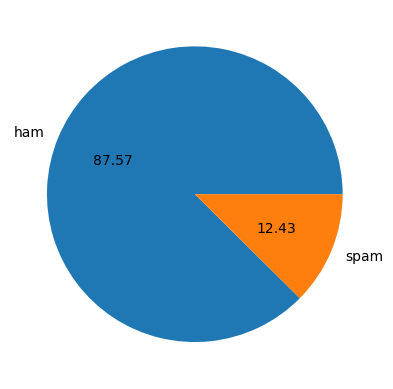

In [21]:
plt.pie(df["Category"].value_counts(), labels=["ham", "spam"], autopct="%0.2f")
plt.show()

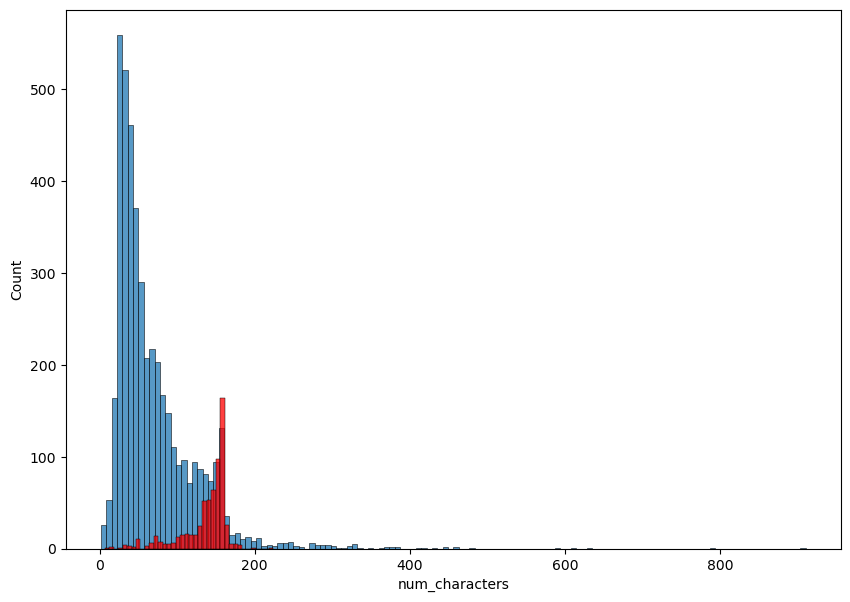

In [22]:
plt.figure(figsize=(10, 7))
sns.histplot(df[df["Category"] == 0]["num_characters"])
sns.histplot(df[df["Category"] == 1]["num_characters"], color="red")
plt.show()

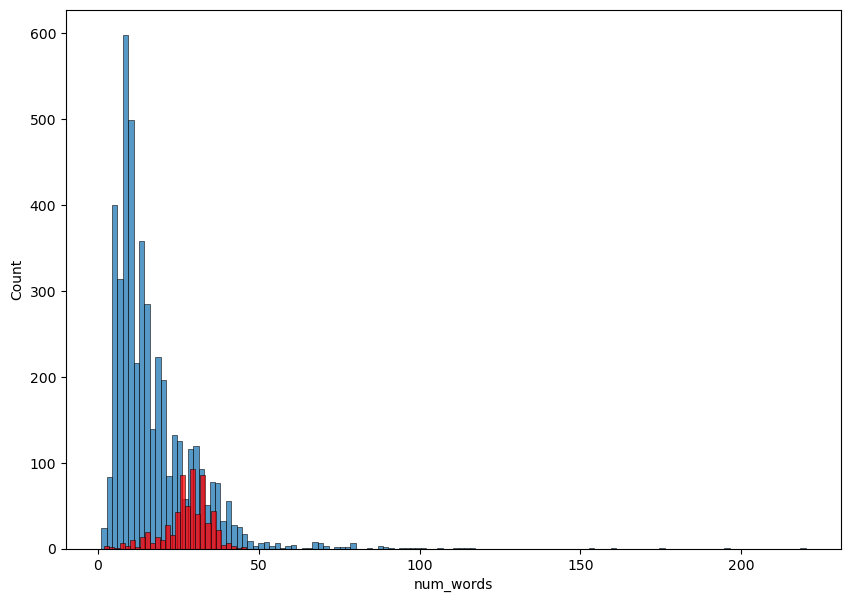

In [23]:
plt.figure(figsize=(10, 7))
sns.histplot(df[df["Category"] == 0]["num_words"])
sns.histplot(df[df["Category"] == 1]["num_words"], color="red")
plt.show()

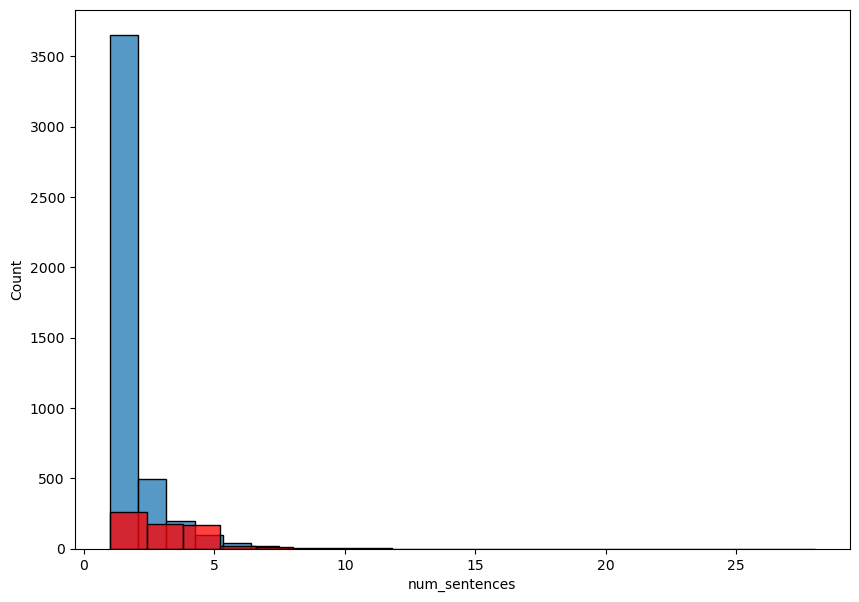

In [24]:
plt.figure(figsize=(10, 7))
sns.histplot(df[df["Category"] == 0]["num_sentences"], bins=25)
sns.histplot(df[df["Category"] == 1]["num_sentences"], color="red", bins=5)
plt.show()

/var/folders/r9/sv2l0znj5xbg1cbcvnh09h4c0000gn/T/ipykernel_35379/221941791.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


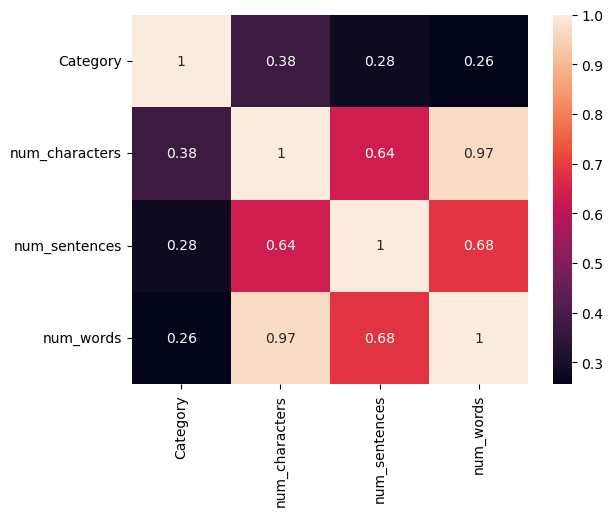

In [25]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [26]:
df=df.fillna(" ")
messages = df["Message"].tolist()
output_labels = df["Category"].values

In [27]:

processed_messages = []

for message in messages:
    message = re.sub(r'\W', ' ', message)
    message = re.sub(r'\s+[a-zA-Z]\s+', ' ', message)
    message = re.sub(r'\^[a-zA-Z]\s+', ' ', message)
    message = re.sub(r'\s+', ' ', message, flags=re.I)
    message = re.sub(r'^b\s+', '', message)
    processed_messages.append(message)

## Model Training

# Random Forest

In [28]:
X_train, X_test, y_train, y_test = train_test_split(processed_messages, output_labels, test_size=0.2, random_state=0)

In [29]:
vectorizer = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.75, stop_words=stopwords.words('english'))
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

In [30]:
spam_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
spam_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [31]:
y_pred = spam_classifier.predict(X_test)

In [32]:
from sklearn.metrics import  accuracy_score
print(accuracy_score(y_test, y_pred))

0.9806201550387597


In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = spam_classifier.predict(X_train) # prediction on the training dataset
print(classification_report(y_train, pred)) #print out the target variable and predicted values
print ()
print ('Confusion Matrix: \n',confusion_matrix(y_train,pred))#
print ()
print ('Accuracy: ', accuracy_score(y_train, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3619
           1       1.00      0.99      1.00       506

    accuracy                           1.00      4125
   macro avg       1.00      1.00      1.00      4125
weighted avg       1.00      1.00      1.00      4125


Confusion Matrix: 
 [[3619    0]
 [   3  503]]

Accuracy:  0.9992727272727273


## Random Forest Using 3-Fold

In [34]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [43]:
X_binary = vectorizer.fit_transform(df['Message'])

In [44]:
X = X_binary
y = df['Category']

In [45]:
accuracy_scores = cross_val_score(rf_clf, X,y, cv=3)

In [46]:
print(accuracy_scores)
average_accuracy = accuracy_scores.mean()
print("Average Accuracy:", average_accuracy)

[0.97440372 0.97149506 0.96684119]
Average Accuracy: 0.970913321698662


In [48]:
y_pred = cross_val_predict(rf_clf,X,y, cv=3)

In [49]:
error_rate = 1 - accuracy_score(y, y_pred)
print("Error Rate:", error_rate)

Error Rate: 0.029086678301338043


In [50]:
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[4510    6]
 [ 144  497]]


In [51]:
# Calculate and print the F1 score
f1 = f1_score(y, y_pred)
print("F1 Score:", f1)


F1 Score: 0.8688811188811189


In [52]:
# Calculate and print recall
recall = recall_score(y, y_pred)
print("Recall:", recall)


Recall: 0.7753510140405616


In [53]:
precision = precision_score(y, y_pred)
print("Precision:", precision)

Precision: 0.9880715705765407


# ADABOOST

In [54]:
vectorizer = CountVectorizer(binary=True, stop_words='english', max_features=5000)

In [55]:
X_binary = vectorizer.fit_transform(df['Message'])

In [56]:
X = X_binary
y = df['Category']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [59]:
adaboost_predictions = adaboost_classifier.predict(X_test)

In [60]:
accuracy = accuracy_score(y_test, adaboost_predictions)
conf_matrix = confusion_matrix(y_test, adaboost_predictions)
classification_rep = classification_report(y_test, adaboost_predictions)

In [61]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9631782945736435
Confusion Matrix:
 [[889   7]
 [ 31 105]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       896
           1       0.94      0.77      0.85       136

    accuracy                           0.96      1032
   macro avg       0.95      0.88      0.91      1032
weighted avg       0.96      0.96      0.96      1032



## Adaboost Using 3-fold

In [62]:
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42)

In [63]:
cv_scores = cross_val_score(ada_clf, X, y, cv=3)

In [64]:
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", cv_scores.mean())

Cross-validation scores: [0.96684119 0.96160558 0.96625945]
Average accuracy: 0.9649020748497188


In [65]:
y_pred = cross_val_predict(ada_clf, X, y, cv=3)

In [66]:
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4475   41]
 [ 140  501]]


In [67]:
error_rate = 1 - accuracy_score(y, y_pred)
print("Error Rate:", error_rate)

Error Rate: 0.035097925150281206


In [68]:
f1 = f1_score(y, y_pred)
print("F1 Score:", f1)

F1 Score: 0.8469991546914624


In [69]:
recall = recall_score(y, y_pred)
print("Recall:", recall)

Recall: 0.781591263650546


In [70]:
precision = precision_score(y, y_pred)
print("Precision:", precision)

Precision: 0.9243542435424354


# Thanks.